# Chapter 11: How to make predictions with a multiple regression model

In [1]:
import pandas as pd
import seaborn as sns

## The Cars dataset

In [2]:
carsData = pd.read_csv('cars.csv')

In [3]:
carsData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# How to create a simple regression model

<AxesSubplot:>

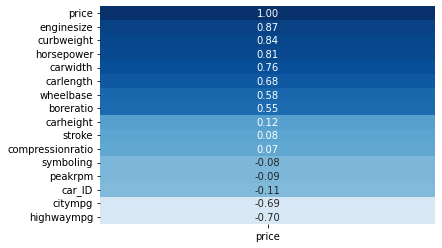

In [5]:
sns.heatmap(data=carsData.corr()[['price']].sort_values('price', ascending=False), 
            annot=True, cmap='Blues', vmin=-1.0, vmax=1.0, cbar=False, fmt='.2f')

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize']], carsData[['price']],
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)
#error measured as R-squared or coefficient of determination
model.score(x_test,y_test)

0.7063964117029844

In [8]:
model.score(x_train, y_train)

0.766524123801206

In [9]:
y_predicted = model.predict(x_test)

In [11]:
# create DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a frame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
#final[['enginesize','price','predictedPrice']].head()
final.head()

,predictedPrice,enginesize,price
0,14905.920686,136,15250.0
1,7164.387613,90,8916.5
2,7500.976007,92,8778.0
3,26181.631901,203,31400.5
4,7500.976007,92,6488.0


## How to plot the residuals of a simple regression

In [12]:
final['residual'] = final.price - final.predictedPrice
final.head(2)

,predictedPrice,enginesize,price,residual
0,14905.920686,136,15250.0,344.079314
1,7164.387613,90,8916.5,1752.112387


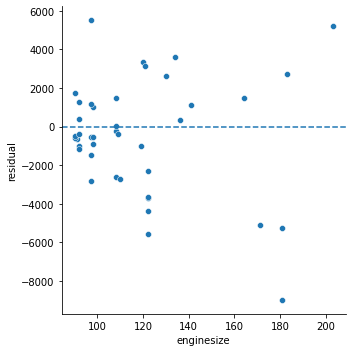

In [13]:
g = sns.relplot(data=final, x='enginesize', y='residual', kind='scatter')
for ax in g.axes.flat:
    ax.axhline(0, ls='--')

<AxesSubplot:xlabel='residual', ylabel='Density'>

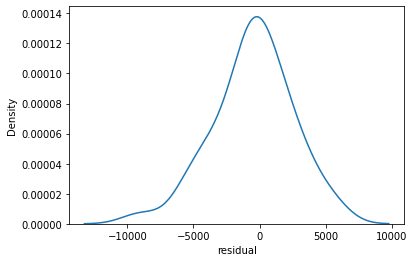

In [14]:
sns.kdeplot(data=final, x='residual')

# How to create a multiple regression model

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    carsData[['enginesize','curbweight']], carsData[['price']], 
    test_size=0.20, random_state=20)

model = LinearRegression()
model.fit(x_train, y_train)

model.score(x_test, y_test)

0.7581072748679533

In [16]:
model.score(x_train, y_train)

0.7950435284247739

In [ ]:
y_predicted = model.predict(x_test)

## How to prepare and plot the multiple regression

In [17]:
# create the DataFrame for the price predictions
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

# combine the test data and the predicted data into a DataFrame
final = predicted.join([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True)])
final.head()[['enginesize','curbweight','price','predictedPrice']]

,enginesize,curbweight,price,predictedPrice
0,136,2507,15250.0,14905.920686
1,90,1874,8916.5,7164.387613
2,92,3110,8778.0,7500.976007
3,203,3366,31400.5,26181.631901
4,92,2015,6488.0,7500.976007


## How to plot the residuals of a multiple regression

In [18]:
final['residual'] = final.price - final.predictedPrice
final.head()

,predictedPrice,enginesize,curbweight,price,residual
0,14905.920686,136,2507,15250.0,344.079314
1,7164.387613,90,1874,8916.5,1752.112387
2,7500.976007,92,3110,8778.0,1277.023993
3,26181.631901,203,3366,31400.5,5218.868099
4,7500.976007,92,2015,6488.0,-1012.976007


<AxesSubplot:xlabel='residual', ylabel='Density'>

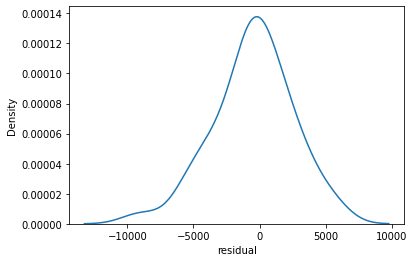

In [19]:
sns.kdeplot(data=final, x='residual')

## How to identify categorical variables

In [20]:
carsData.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## How to review categorical variables

### Dichotomous variables

In [21]:
carsData.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [22]:
carsData.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [23]:
carsData.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [24]:
carsData.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

### Nominal variables

In [25]:
carsData.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [26]:
carsData.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [27]:
carsData.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [28]:
carsData.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [29]:
carsData.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

## How to create dummy variables

In [31]:
catColumns = ['aspiration','doornumber','carbody','drivewheel']
dummies = pd.get_dummies(carsData[catColumns])
dummies.head()

,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,1,0,0,1,1,0,0,0,0,0,0,1
1,1,0,0,1,1,0,0,0,0,0,0,1
2,1,0,0,1,0,0,1,0,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0
4,1,0,1,0,0,0,0,1,0,1,0,0


In [32]:
carsDummies = carsData.drop(columns=catColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   enginelocation       205 non-null    object 
 5   wheelbase            205 non-null    float64
 6   carlength            205 non-null    float64
 7   carwidth             205 non-null    float64
 8   carheight            205 non-null    float64
 9   curbweight           205 non-null    int64  
 10  enginetype           205 non-null    object 
 11  cylindernumber       205 non-null    object 
 12  enginesize           205 non-null    int64  
 13  fuelsystem           205 non-null    object 
 14  boreratio            205 non-null    float64
 15  stroke               205 non-null    flo

In [34]:
carsData.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## How to rescale the data and check the correlations

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numCols = ['wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg']
carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])
carsDummies.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
count,205.000000,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,-1.291108e-15,3.656696e-15,1.089643e-15,-5.372396e-16,1.126470e-16,3.466062e-17,2.252940e-15,2.062307e-15,...,0.560976,0.439024,0.029268,0.039024,0.341463,0.468293,0.121951,0.043902,0.585366,0.370732
std,59.322565,1.245307,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,0.497483,0.497483,0.168970,0.194127,0.475361,0.500215,0.328031,0.205380,0.493865,0.484183
min,1.000000,-2.000000,-2.023713e+00,-2.677244e+00,-2.620512e+00,-2.430664e+00,-2.055348e+00,-1.586561e+00,-2.923049e+00,-3.789311e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,-7.085959e-01,-6.296552e-01,-8.447824e-01,-7.076263e-01,-7.904486e-01,-7.199469e-01,-6.653141e-01,-4.648342e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,1.000000,-2.924196e-01,-6.900603e-02,-1.905661e-01,1.538927e-01,-2.725519e-01,-1.662771e-01,-7.312136e-02,1.105560e-01,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,154.000000,2.000000,6.065210e-01,7.354037e-01,4.636501e-01,7.282388e-01,7.305117e-01,3.392475e-01,9.262039e-01,4.941494e-01,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,205.000000,3.000000,3.686225e+00,2.766741e+00,2.987056e+00,2.492302e+00,2.907988e+00,4.792679e+00,2.258638e+00,2.923575e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
carsDummies.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
drivewheel_rwd,0.638957
wheelbase,0.577816
boreratio,0.553173
carbody_hardtop,0.225854


## How to create a multiple regression that includes dummy variables

In [37]:
carsTrain, carsTest = train_test_split(carsDummies, test_size=0.2, 
    random_state=20)

In [38]:
model = LinearRegression()
xCols = ['enginesize','horsepower','carwidth',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])

model.score(carsTest[xCols], carsTest['price'])

0.7523820020019687

In [39]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8334860355280258

In [40]:
y_predicted = model.predict(carsTest[xCols])

In [41]:
predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])

final = predicted.join([carsTest[xCols].reset_index(drop=True),
                        carsTest['price'].reset_index(drop=True)])

final[['enginesize','horsepower','carwidth','drivewheel_rwd',
       'highwaympg','price','predictedPrice']].head()

,enginesize,horsepower,carwidth,drivewheel_rwd,highwaympg,price,predictedPrice
0,0.218885,0.149133,0.183272,0,-0.837195,15250.0,13517.858822
1,-0.888455,-0.864871,-1.078431,0,1.783034,8916.5,5968.304606
2,-0.840310,-1.067671,-1.078431,0,0.181783,8778.0,4984.725918
3,1.831749,4.661448,2.987056,1,-0.400490,31400.5,37778.843127
4,-0.840310,-1.067671,-1.078431,0,1.055193,6488.0,5347.966676


## How to select the independent variables

<AxesSubplot:>

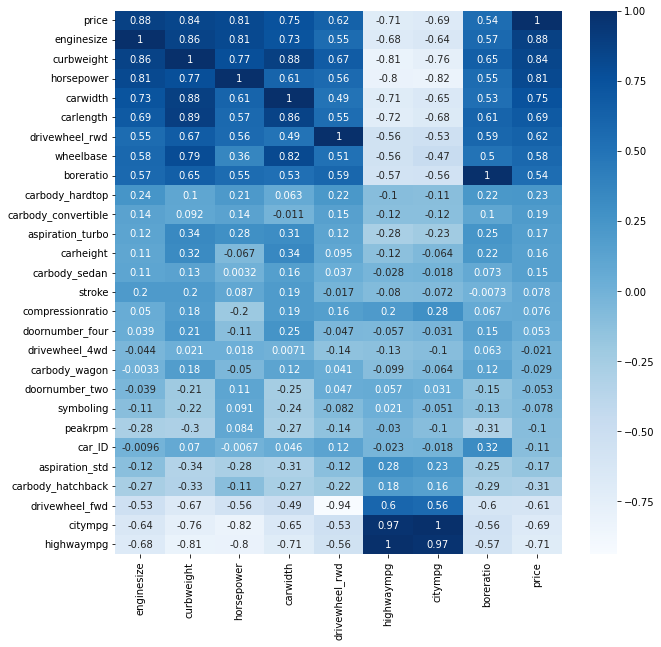

In [42]:
# use Matplotlib to set the size of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))

# create the heatmap
sns.heatmap(carsTrain.corr()[['enginesize','curbweight','horsepower','carwidth',
                              'drivewheel_rwd','highwaympg','citympg','boreratio',
                              'price']].sort_values(by='price', ascending=False), 
            cmap='Blues', annot=True)

## How to test different combinations of variables

### An initial model that's fitted to eight independent variables

In [43]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth', 'carlength',
         'drivewheel_rwd','highwaympg','citympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.739243731429341

In [44]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8344434015448826

### The initial model without the citympg column

In [45]:
model = LinearRegression()
xCols = ['enginesize','curbweight','horsepower','carwidth','carlength',
         'drivewheel_rwd','highwaympg']
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.7430944903647659

In [46]:
model.score(carsTrain[xCols], carsTrain['price'])

0.8339017954221501

### A model that's fitted to all the numeric and dummy variables

In [47]:
model = LinearRegression()
xCols = carsTrain.corr().drop(columns=['price']).columns.tolist()
model.fit(carsTrain[xCols], carsTrain['price'])
model.score(carsTest[xCols], carsTest['price'])

0.7741309452324634

In [48]:
xCols

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd']

In [49]:
model.score(carsTrain[xCols], carsTrain['price'])

0.893488927713899

## How to use SciKit learn to select the variables

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [51]:
carsTrain, carsTest = train_test_split(carsDummies.drop(
    columns=['CarName','fueltype','enginelocation','cylindernumber',
             'fuelsystem','enginetype']), test_size=0.2, random_state=20)

In [52]:
fs = SelectKBest(score_func=mutual_info_regression, k=20)
fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

SelectKBest(k=20,
            score_func=<function mutual_info_regression at 0x0000021B13A4D1F0>)

In [53]:
x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
x_test_fs = fs.transform(carsTest.drop(columns=['price']))

In [54]:
model = LinearRegression()
model.fit(x_train_fs, carsTrain['price'])
model.score(x_test_fs, carsTest['price'])

0.7730268917681574

In [57]:
model.score(x_train_fs, carsTrain['price'])

0.8826996202377456

In [58]:
df1 = pd.DataFrame(carsTrain.drop(columns=['price']).columns, columns=['feature'])
df2 = pd.DataFrame(fs.scores_, columns=['importance'])
importance = df1.join(df2)
importance.sort_values('importance', ascending=False).head()

,feature,importance
6,curbweight,0.902655
11,horsepower,0.871291
14,highwaympg,0.868069
7,enginesize,0.851391
13,citympg,0.721353


## How to select the right number of variables

<AxesSubplot:xlabel='numFeatures'>

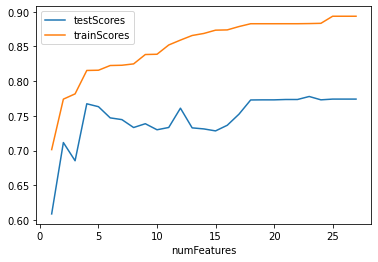

In [59]:
model = LinearRegression()
testScores = []
trainScores = []

for i in range(1, len(carsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(carsTrain.drop(columns=['price']), carsTrain['price'])

    x_train_fs = fs.transform(carsTrain.drop(columns=['price']))
    x_test_fs = fs.transform(carsTest.drop(columns=['price']))

    model.fit(x_train_fs, carsTrain['price'])
    
    testScore = model.score(x_test_fs, carsTest['price'])
    trainScore = model.score(x_train_fs, carsTrain['price'])
    testScores.append(testScore)
    trainScores.append(trainScore)
    
df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df.numFeatures = df.numFeatures + 1
df.plot(x='numFeatures', y=['testScores','trainScores'])

In [ ]:
# Or, if you only want to plot the gap, you could do it like this...
df['gap'] = df['trainScores'] - df['testScores']
df.plot(x='numFeatures', y=['gap'])